In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from math import radians
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

%matplotlib inline

## Disable Warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [3]:
df = pd.read_json("contact.json")

In [4]:
df

,id,timestamp,latitude,longitude
0,Alice,2020-06-28 19:52:26,12.880172,77.784798
1,Alice,2020-06-28 20:52:26,12.993111,77.596512
2,Alice,2020-06-28 21:52:26,12.975756,77.463615
3,Alice,2020-06-28 22:52:26,12.974606,77.615150
4,Alice,2020-06-28 23:52:26,12.997514,77.706261
...,...,...,...,...
236,Judy,2020-06-29 14:52:26,13.064901,77.579422
237,Judy,2020-06-29 15:52:26,12.895975,77.532829
238,Judy,2020-06-29 16:52:26,12.935904,77.740227
239,Judy,2020-06-29 17:52:26,13.026723,77.576401


In [5]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         id  timestamp  latitude  longitude
0    False      False     False      False
1    False      False     False      False
2    False      False     False      False
3    False      False     False      False
4    False      False     False      False
..     ...        ...       ...        ...
236  False      False     False      False
237  False      False     False      False
238  False      False     False      False
239  False      False     False      False
240  False      False     False      False

[241 rows x 4 columns]>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         241 non-null    object        
 1   timestamp  241 non-null    datetime64[ns]
 2   latitude   241 non-null    float64       
 3   longitude  241 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 7.7+ KB


In [7]:
df.describe()

,latitude,longitude
count,241.000000,241.000000
mean,12.969013,77.624182
std,0.054117,0.106017
min,12.880172,77.445770
25%,12.924060,77.532829
50%,12.969007,77.623604
75%,13.010509,77.712913
max,13.068818,77.797501


In [8]:
print(len(df))

241


In [9]:
df.isnull().sum()

id           0
timestamp    0
latitude     0
longitude    0
dtype: int64

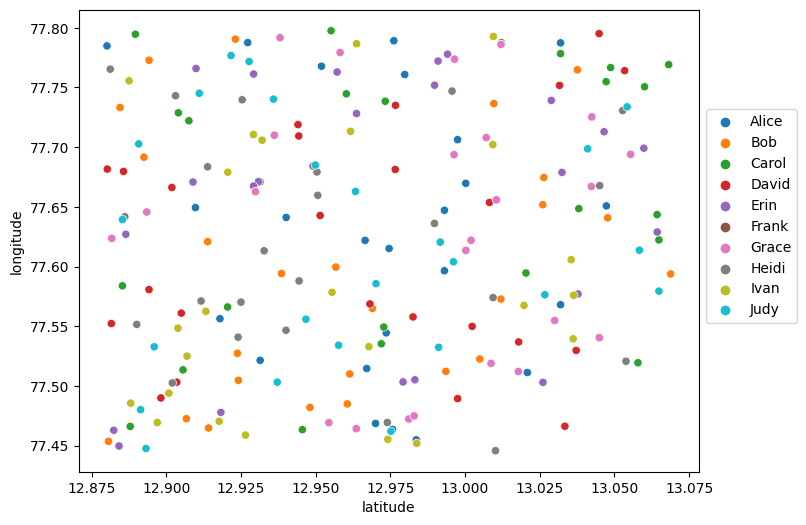

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor= [1, 0.8])
plt.show()

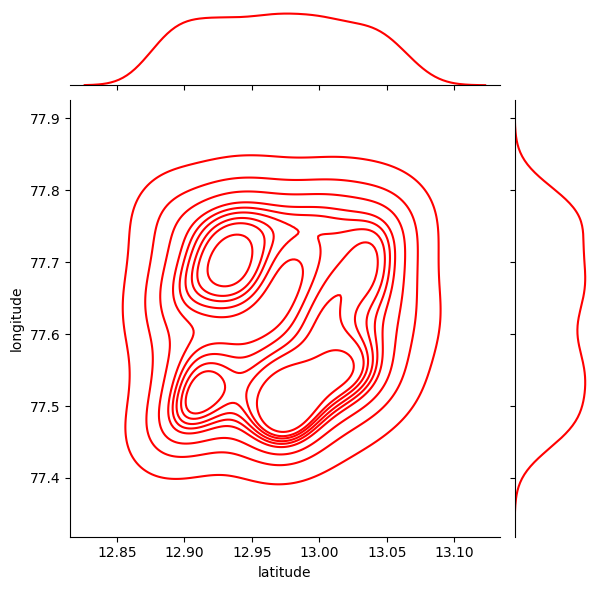

In [11]:
sns.jointplot(x='latitude', y='longitude', data=df, color='red', kind='kde')

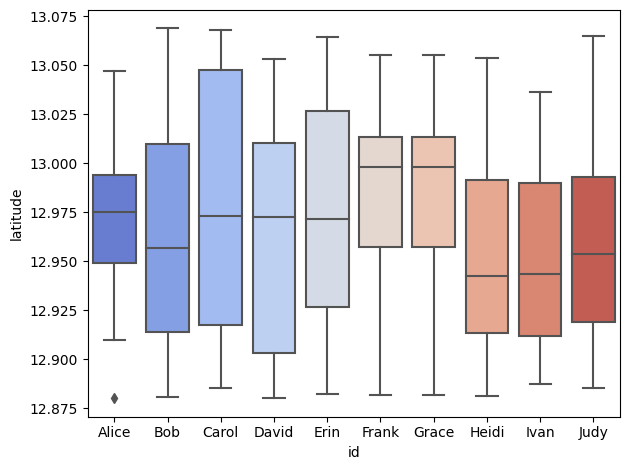

In [12]:
sns.boxplot(x='id', y= 'latitude', data = df, palette = 'coolwarm')
plt.tight_layout()

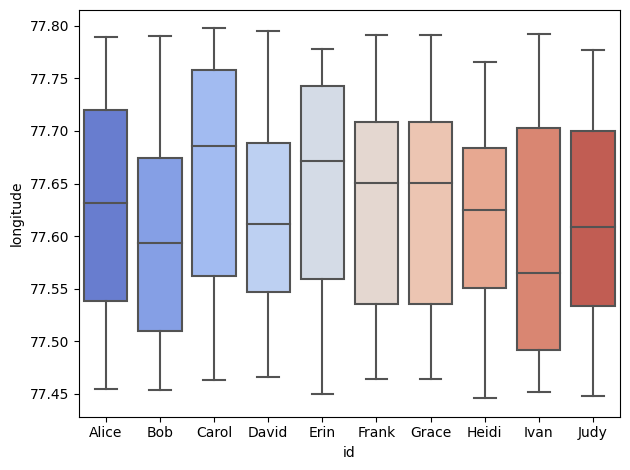

In [13]:
sns.boxplot(x='id',y='longitude',data=df, palette='coolwarm')
plt.tight_layout()

## Creating a Model for Contact Tracing

In [14]:
epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
model = DBSCAN(eps = epsilon, min_samples = 2, metric = 'haversine').fit(df[['latitude', 'longitude']])
df['cluster'] = model.labels_.tolist()

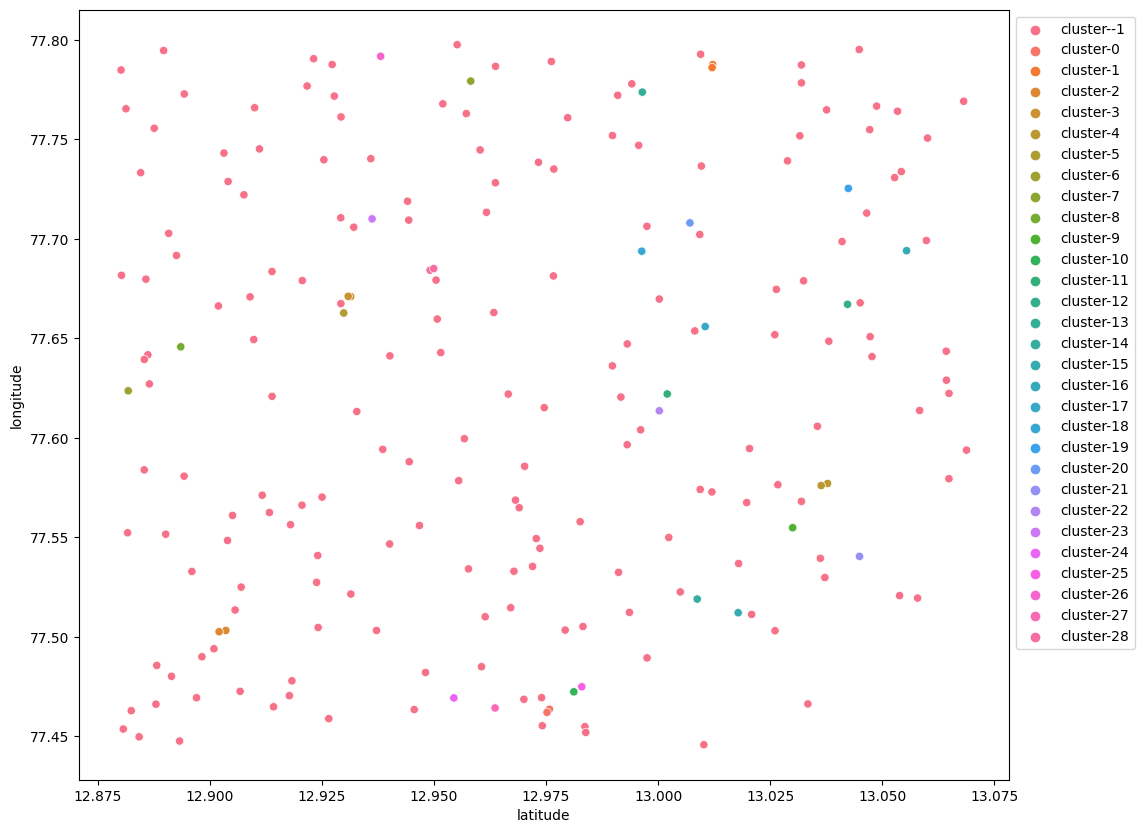

In [15]:
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x='latitude', y='longitude', hue = ['cluster-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])

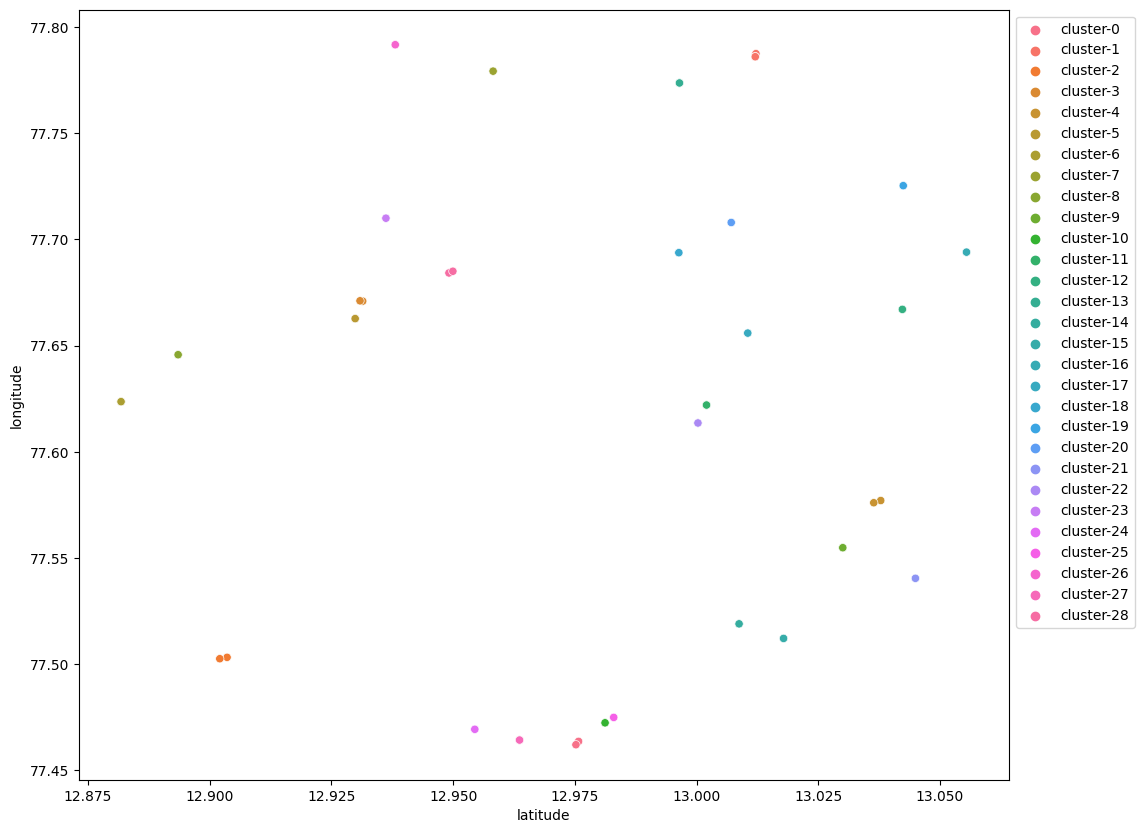

In [16]:
ids = df[(df['cluster'] == -1)].index
df.drop(ids, inplace = True)
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sns.scatterplot(data = df, x = 'latitude', y = 'longitude', hue = ['cluster-{}'.format(x) for x in df['cluster']])
plt.legend(bbox_to_anchor = [1, 1])

In [17]:
def get_infected_names(input_name):
    epsilon = 0.0018288  # a radial distance of 6 feet in kilometers
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()

    input_name_clusters = []
    for index, row in df.iterrows():
        if row['id'] == input_name:
            if row['cluster'] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(row['cluster'])

    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for member_id in ids_in_cluster:
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    return infected_names

In [18]:
get_infected_names("David")

['Heidi']

In [19]:
get_infected_names('Alice')

['Judy']

In [20]:
get_infected_names('Erin')

['Ivan']

In [21]:
get_infected_names('Judy')

['Heidi', 'Alice']

In [22]:
get_infected_names('Ivan')

['Erin']

In [23]:
get_infected_names('Heidi')

['David', 'Judy']